# importing necessary libraries

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# image data agumentation

In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# loading our data and performing data augmentation

In [32]:
train_set = train_datagen.flow_from_directory('../dataset/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 316 images belonging to 3 classes.


In [33]:

test_set = test_datagen.flow_from_directory('../dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [37]:
print(train_set.class_indices)

{'crack': 0, 'flakes': 1, 'roof': 2}


In [39]:
from collections import Counter as c
c(train_set .labels)

Counter({0: 86, 1: 176, 2: 54})

# resizing the images

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = 'data/train_set'
valid_path = 'data/test_set'

# Pre-trained CNN model as a Feature Extractor

In [3]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 7s 0us/step


In [6]:
for layer in vgg16.layers:
    layer.trainable=False

In [15]:
folders=glob('../dataset/train_set/*')

In [16]:
folders

['../dataset/train_set\\crack',
 '../dataset/train_set\\flakes',
 '../dataset/train_set\\roof']

In [17]:
x = Flatten()(vgg16.output)

# Adding Dense Layers

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

# Compiling the model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model

In [35]:

r=model.fit_generator(train_set,validation_data=test_set,epochs=10,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 340s 34s/step - loss: 0.9530 - accuracy: 0.6139 - val_loss: 0.7497 - val_accuracy: 0.7333
Epoch 2/10
10/10 [==============================] - 276s 28s/step - loss: 0.4327 - accuracy: 0.8291 - val_loss: 0.5881 - val_accuracy: 0.7833
Epoch 3/10
10/10 [==============================] - 273s 27s/step - loss: 0.3782 - accuracy: 0.8386 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 315s 31s/step - loss: 0.2711 - accuracy: 0.9051 - val_loss: 0.7427 - val_accuracy: 0.7667
Epoch 5/10
10/10 [==============================] - 373s 37s/step - loss: 0.2216 - accuracy: 0.9209 - val_loss: 0.6348 - val_accuracy: 0.7917
Epoch 6/10
10/10 [==============================] - 322s 32s/step - loss: 0.1446 - accuracy: 0.9620 - val_loss: 0.5804 - val_accuracy: 0.8167
Epoch 7/10
10/10 [==============================] - 301s 30s/step - loss

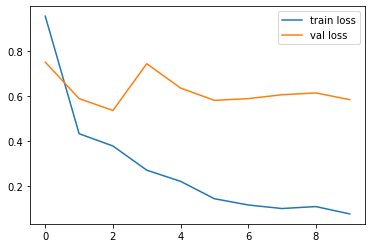

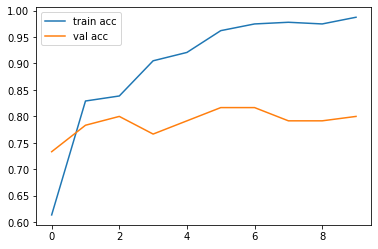

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# save the model

In [43]:
from tensorflow.keras.models import load_model
model.save('model_building_defects_vgg16.h5')

# test the model 

In [44]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model=load_model("model_building_defects_vgg16.h5")

Using TensorFlow backend.


In [46]:
img=image.load_img(r'E:\dataset\test_set\flakes\38.jpg',target_size=(224,224))
x=image.img_to_array(img)
#x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)

In [47]:
a

array([1], dtype=int64)

In [48]:
index=['crack','flakes','roof']
result=str(index[a[0]])
result

'flakes'